# Data description

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the data set

In [3]:
df= pd.read_csv('census_income.csv')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape

(32560, 15)

we have 32560 rows and 15 columns

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

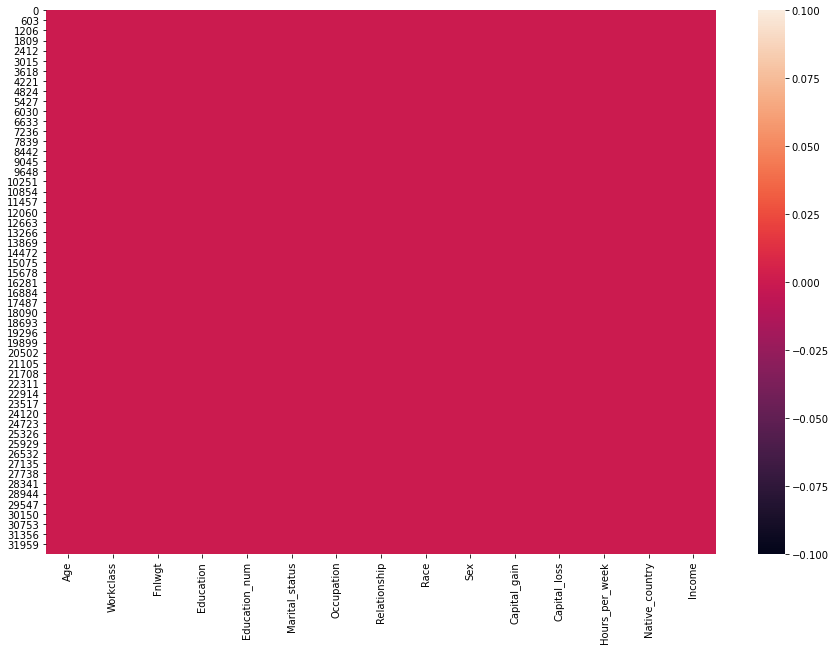

In [9]:
plt.figure(figsize=[15,10])
sns.heatmap(df.isnull())
plt.show()

There is no missing value

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we have few variables with object datatypes, we have to convert it to int or float.

# Dividing the dataframe into Categorical and numeric variables

In [11]:
df_cat = df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country', 'Income']].copy()

In [12]:
df_num = df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].copy()

# Data Visualization

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


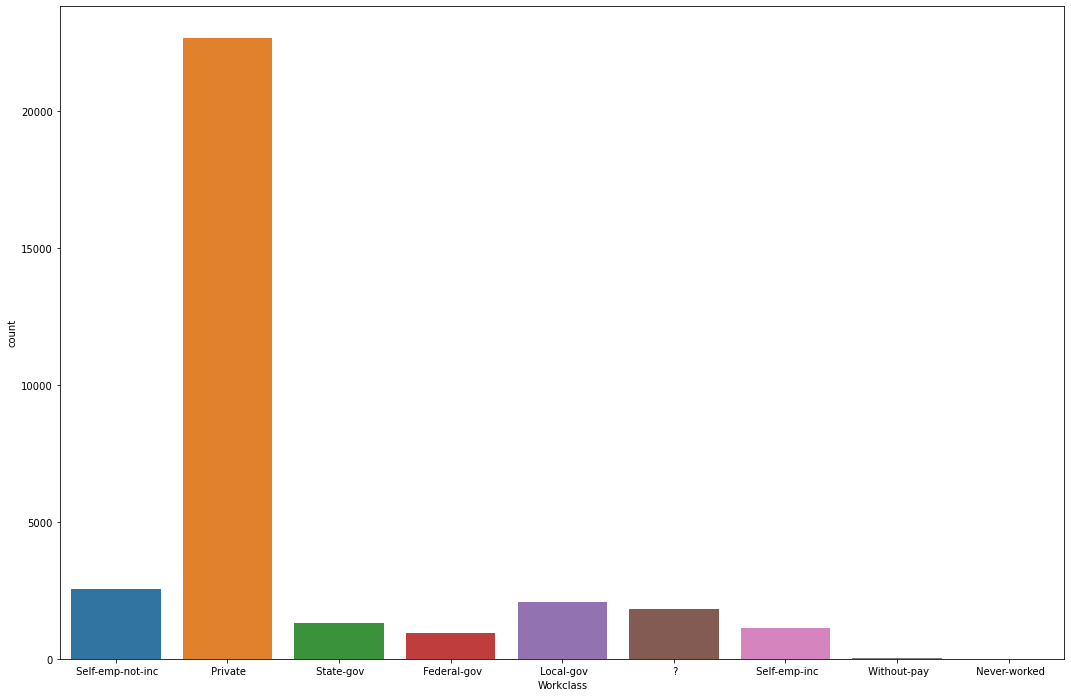

In [13]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Workclass'])
print(df_cat['Workclass'].value_counts())

Maximum people are in Private companies. Also, there is one more category with '?'. we have to treat it.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


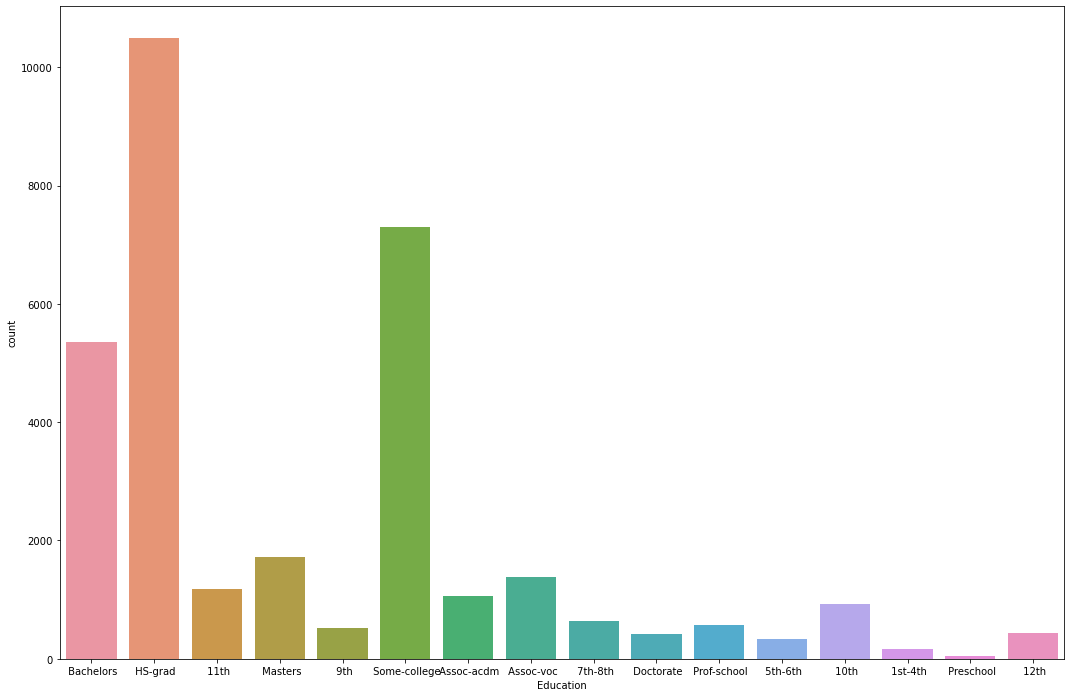

In [14]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Education'])
print(df_cat['Education'].value_counts())

Maxiumum people are HS-graduates.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


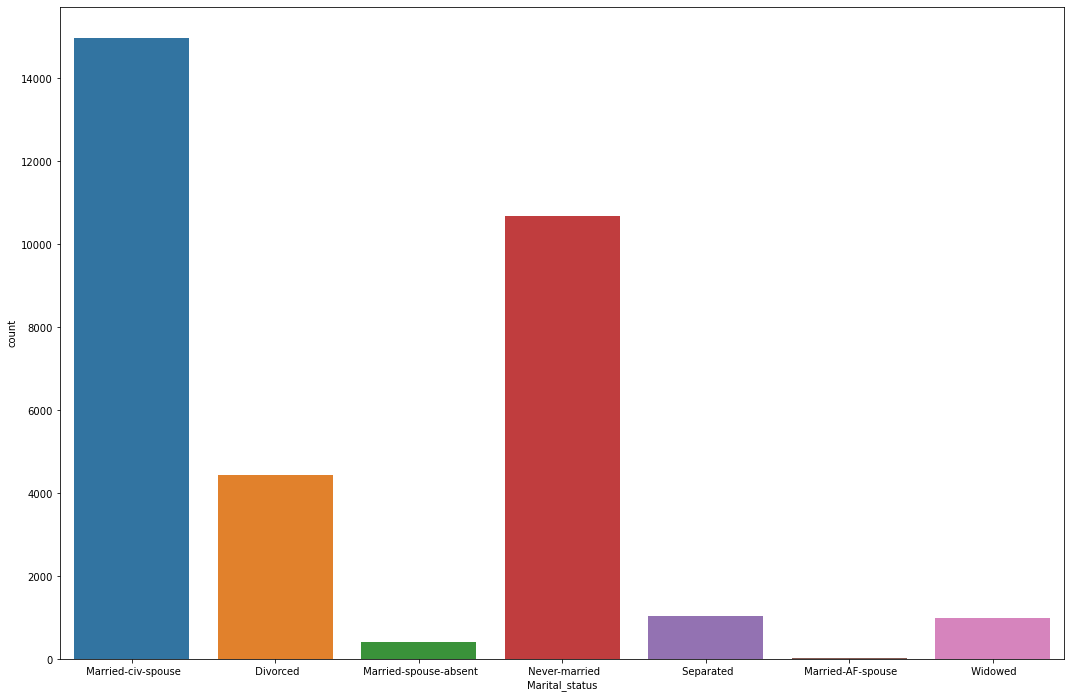

In [15]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Marital_status'])
print(df_cat['Marital_status'].value_counts())

Most of the people are married with spouse in civil.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


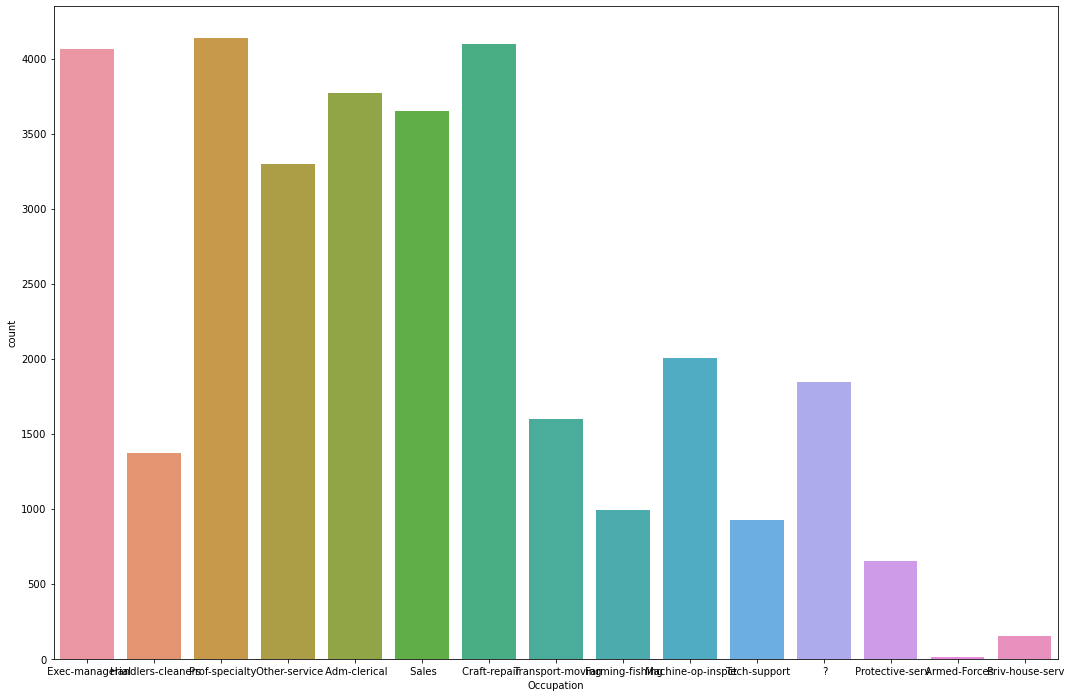

In [16]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Occupation'])
print(df_cat['Occupation'].value_counts())

Maximum people are into  Prof-specialty. We can also see some data with '?' category.we need to treat it.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


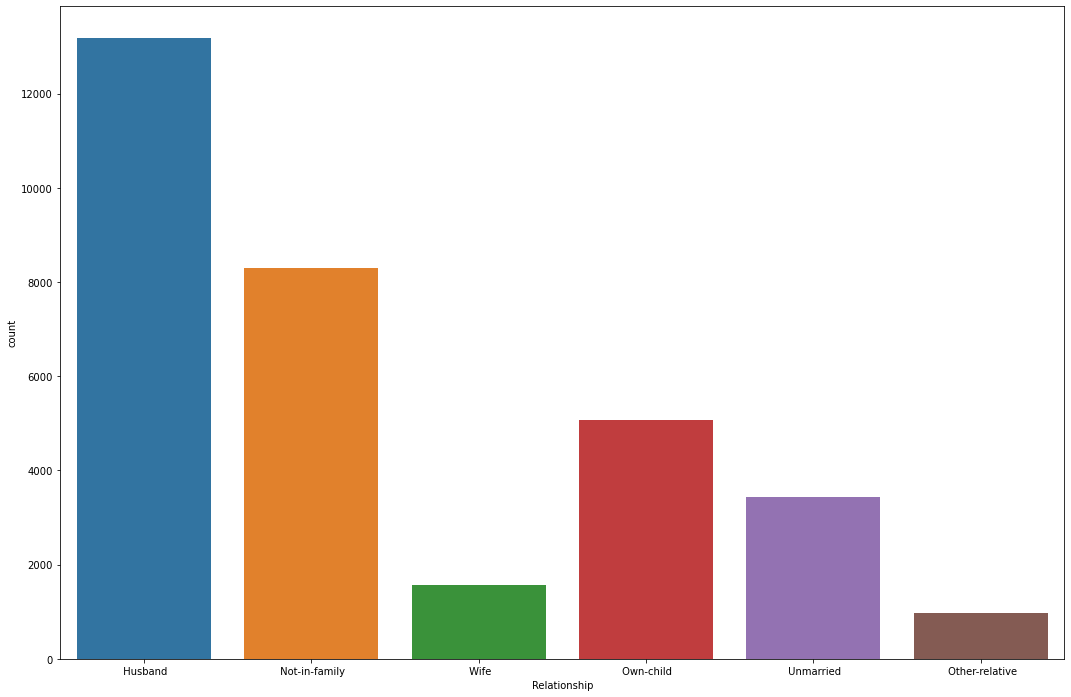

In [17]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Relationship'])
print(df_cat['Relationship'].value_counts())

Husbands are earning more in whole family.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


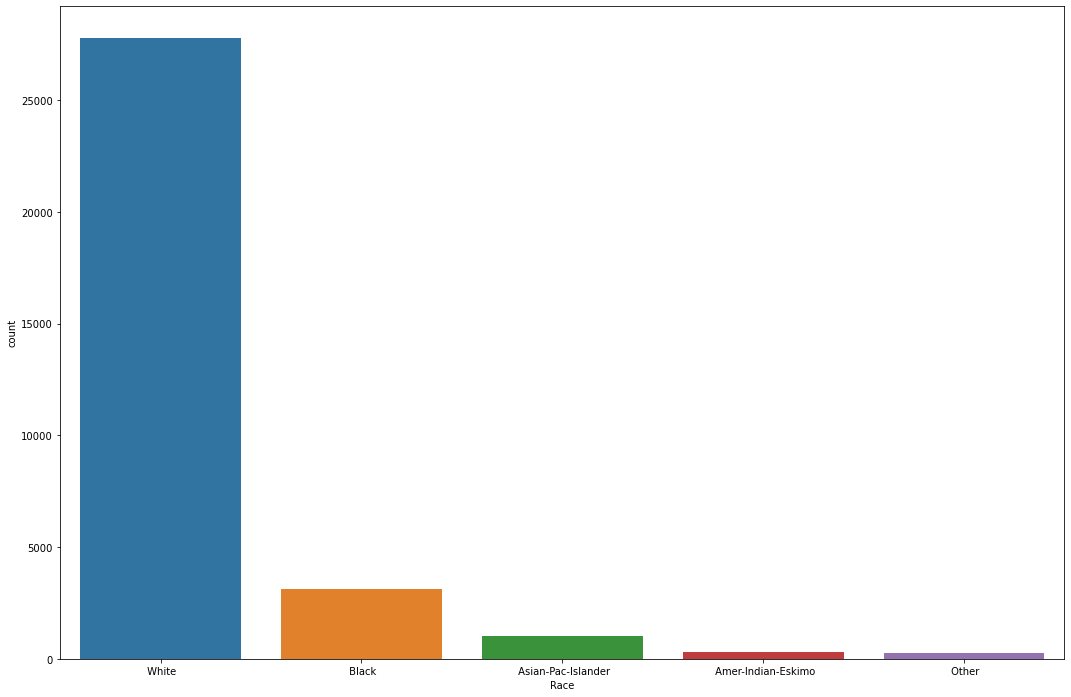

In [18]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Race'])
print(df_cat['Race'].value_counts())

White people's earning is highest.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


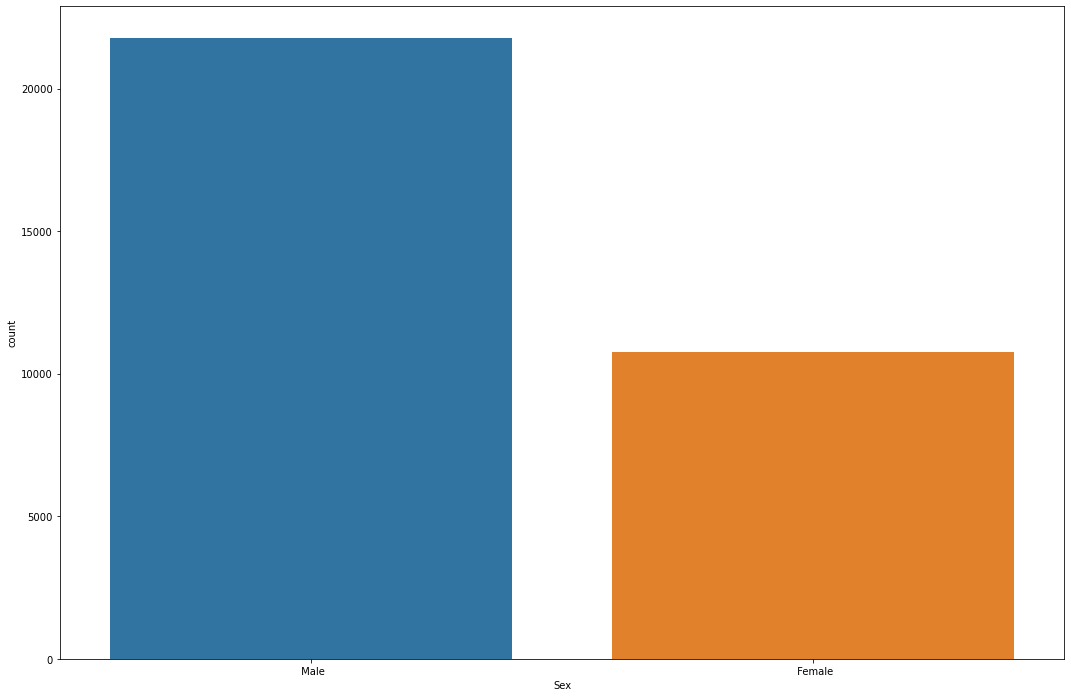

In [19]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Sex'])
print(df_cat['Sex'].value_counts())

Males are earning more than female.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

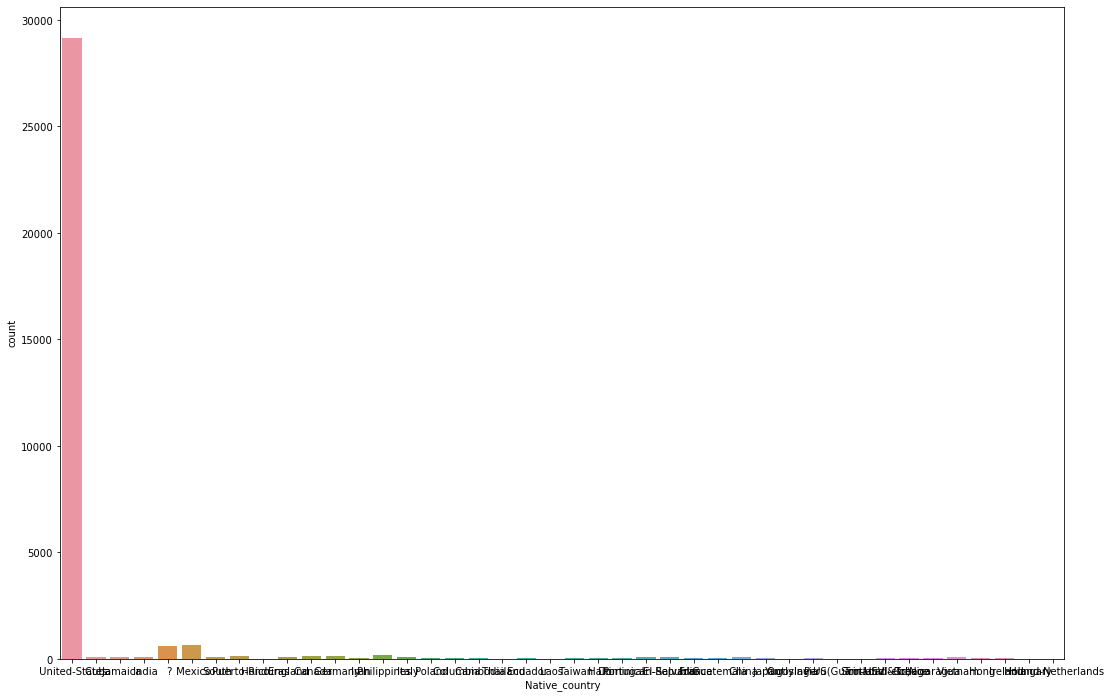

In [20]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Native_country'])
print(df_cat['Native_country'].value_counts())

People in United States have the highest earning. In this column also, we have'?' category.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


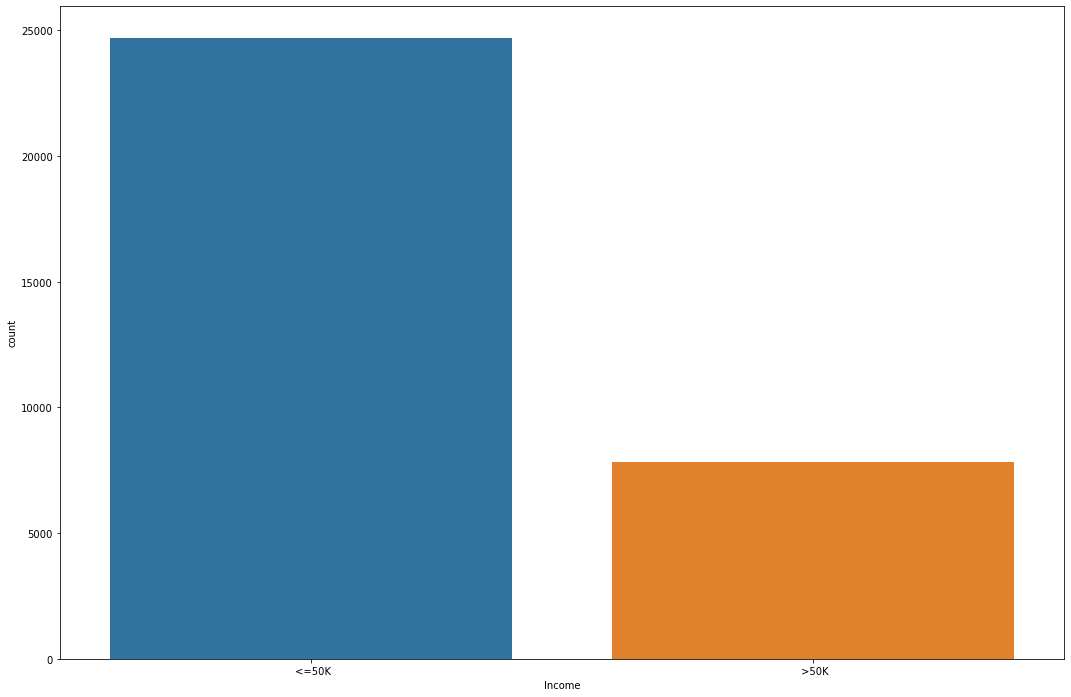

In [21]:
plt.figure(figsize=[18,12])
sns.countplot(x=df_cat['Income'])
print(df_cat['Income'].value_counts())

More people are having income under 50000. We can say that data is balanced.

In [23]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

We need to replace ' ?' from Workclass,Occupation and Native_country with mode.

In [24]:
for i in ['Workclass','Occupation','Native_country']:
    df[i] = df[i].replace(' ?',df[i].mode()[0])

In [25]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

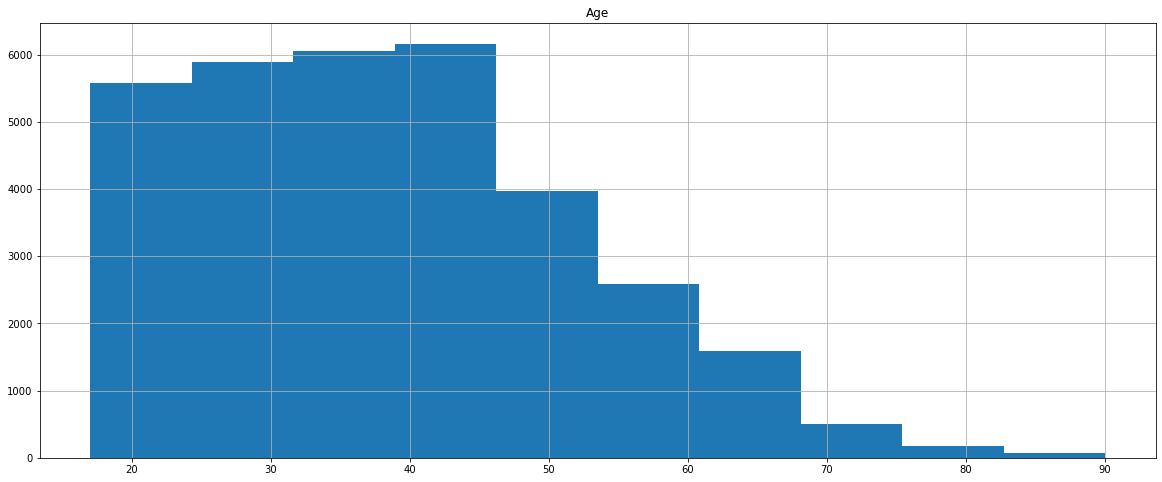

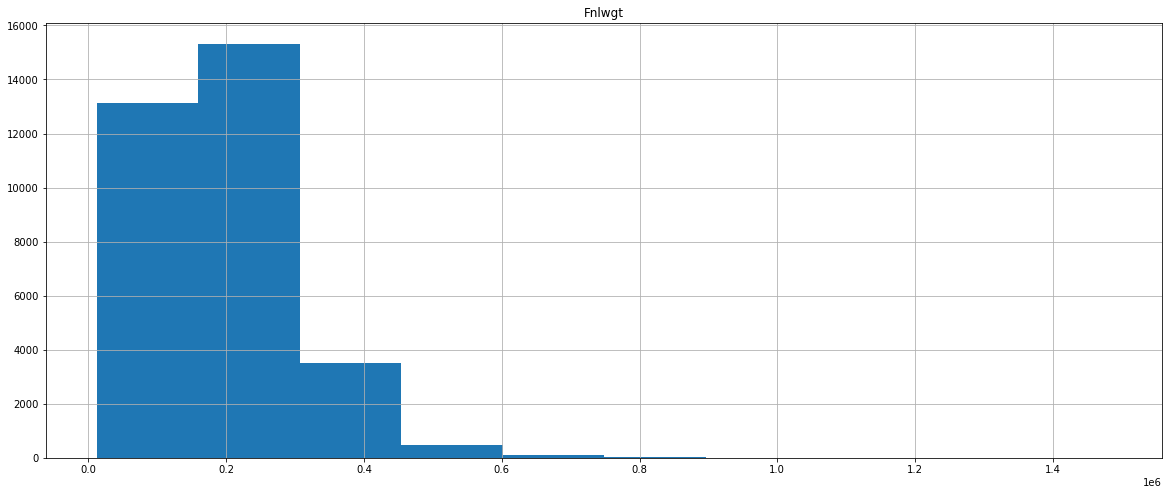

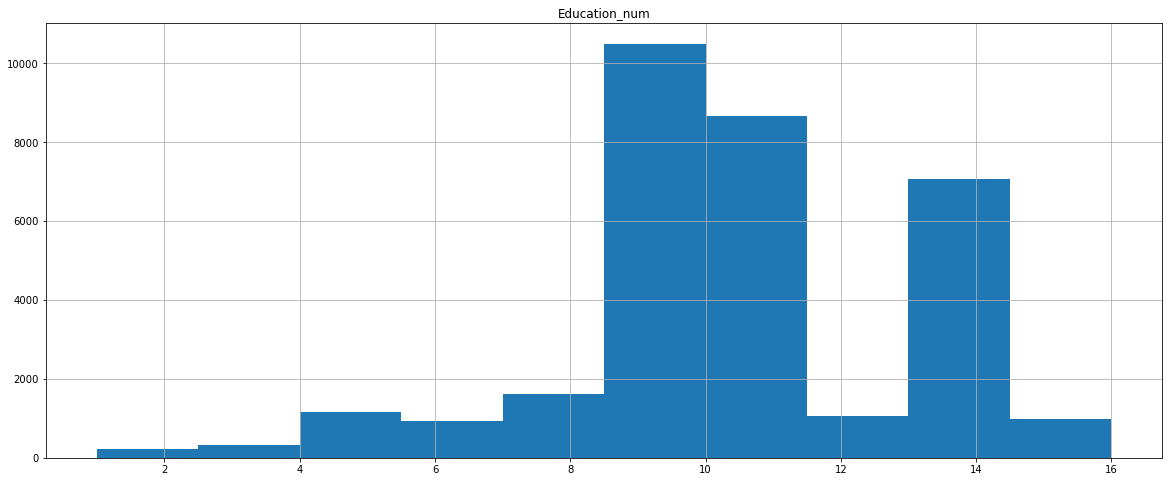

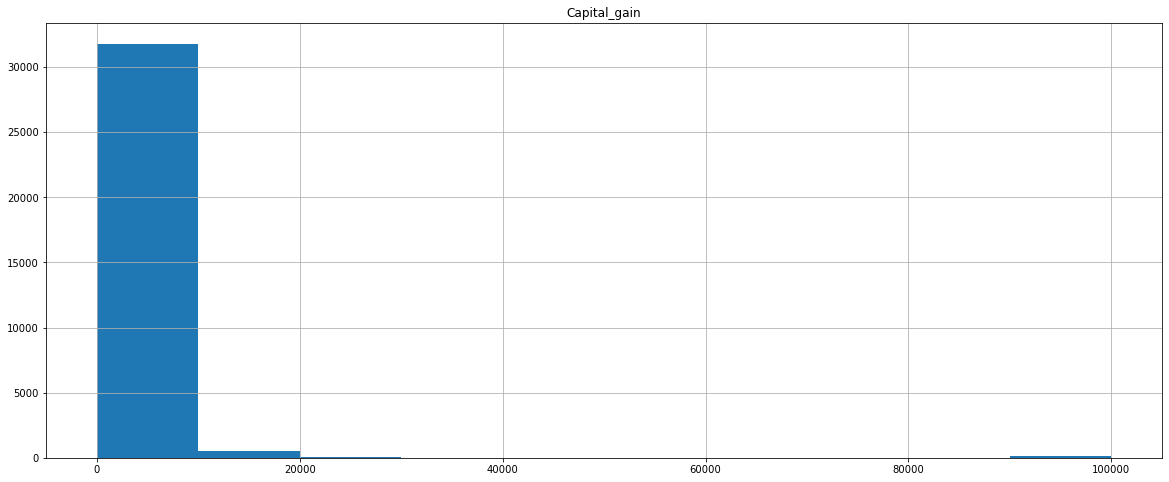

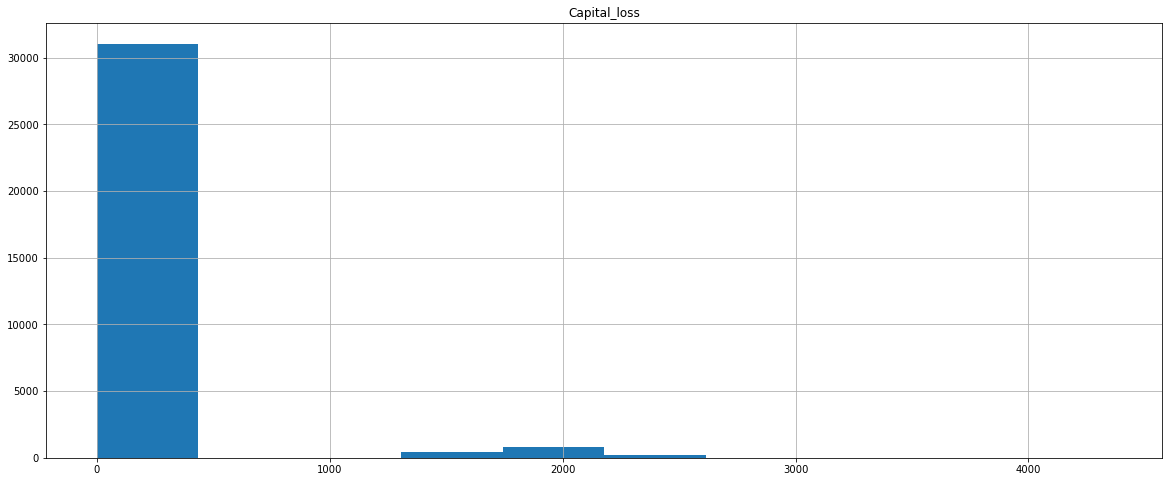

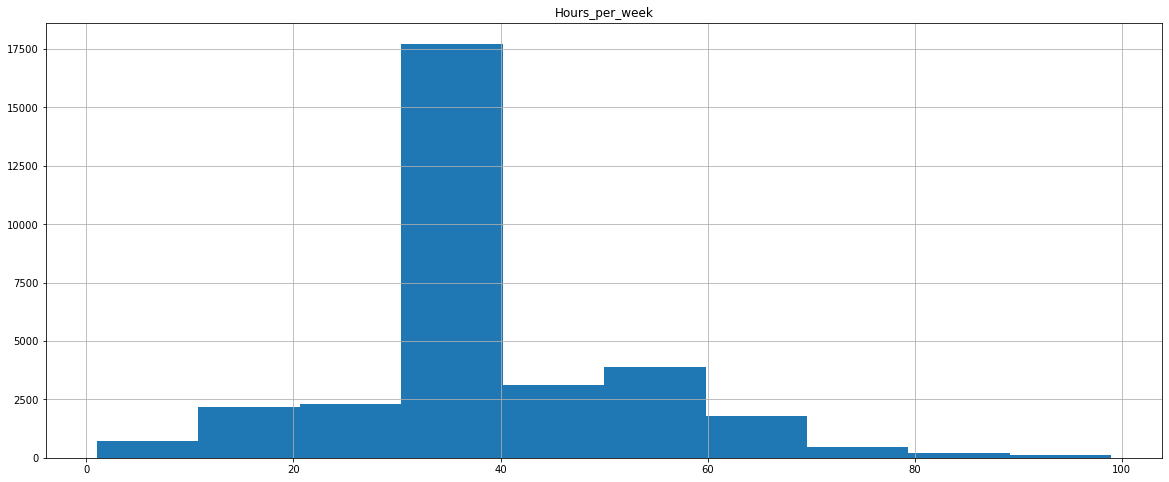

In [26]:
for i in df_num:                                
    plt.figure(figsize = (20, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

# Encoding the dataframe

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [30]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


# Checking the correlation

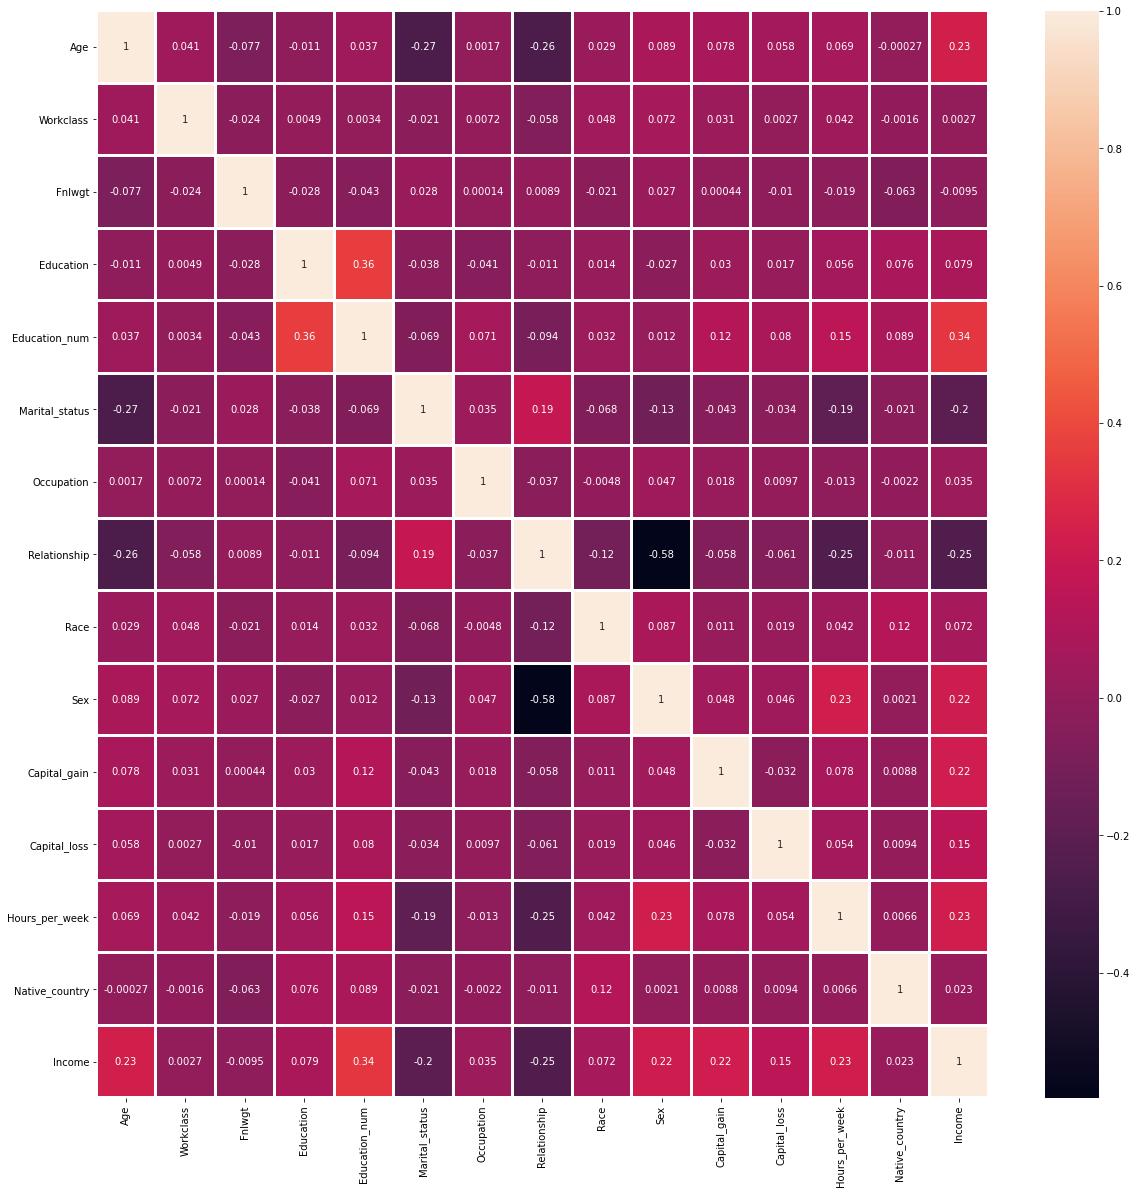

In [32]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True,linewidths=2.0)
plt.show()

Observations
- Age is positively correlated to Income and negatively correlated to Relationship, Marital_status.
- Education is positvely correlated to Education_num.
- Education_num is positively correlated to Income and Education.
- Relationship is negatively correlated to Sex.
- Sex is positively correlated to Sex, Hours_per_week and negatively correlated to Relationship.
- Hours per week is negatively correlated to Relationship, Marital_status and positively correlated to Sex.
- Income is positively correlated to Hours_per_week,Capital_gain,Sex,Education_num,Age and negatively correlated to 
  Marital_status,Relationship.

In [33]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


There are chances of outliers in few columns.Also, there is slight skewness in few columns

# Checking Outliers and Skewness

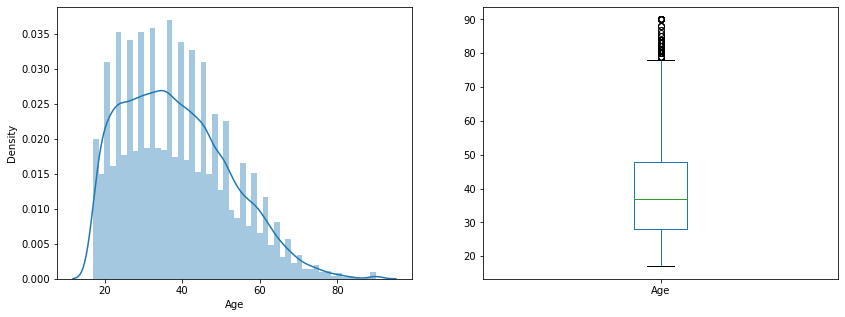

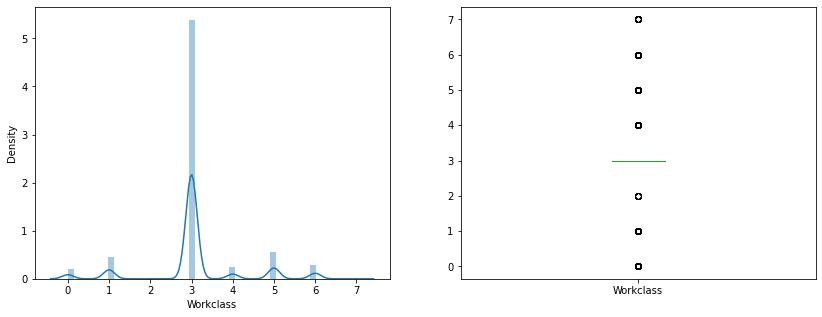

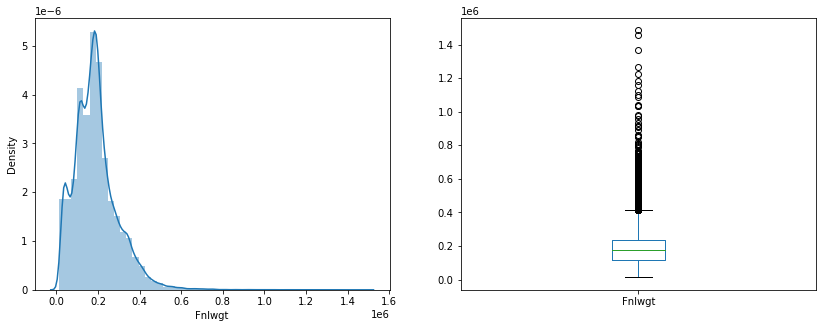

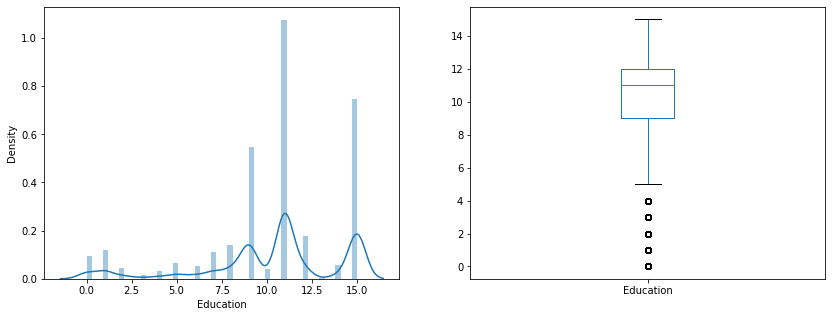

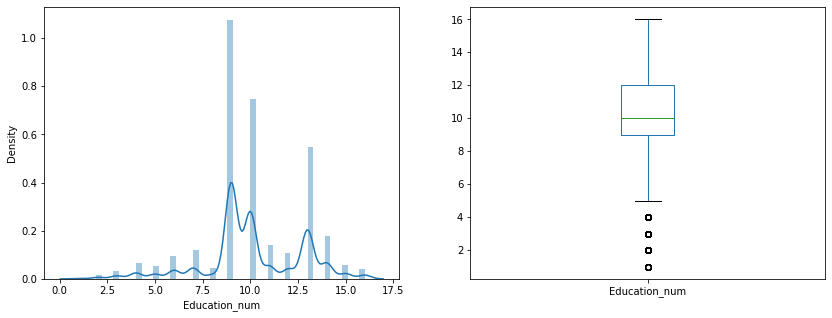

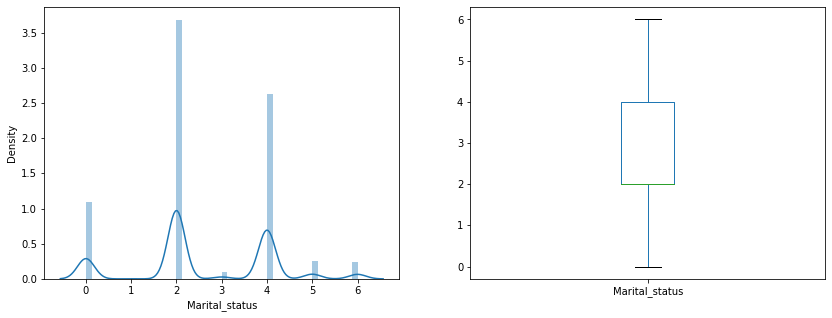

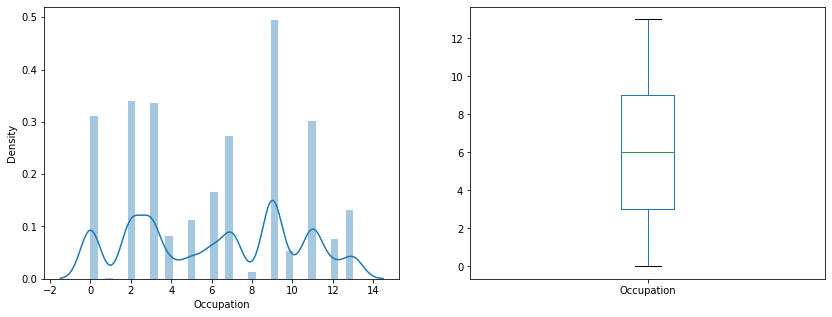

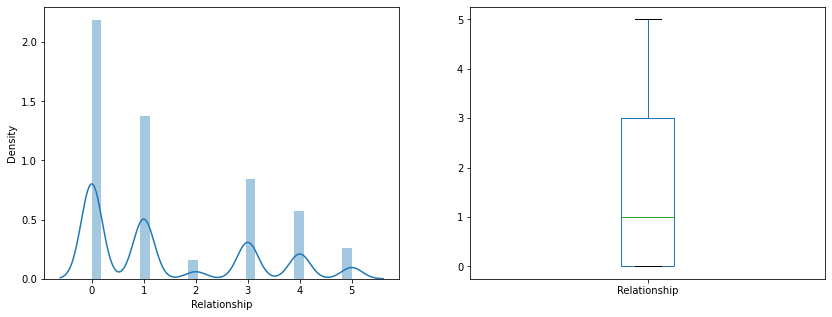

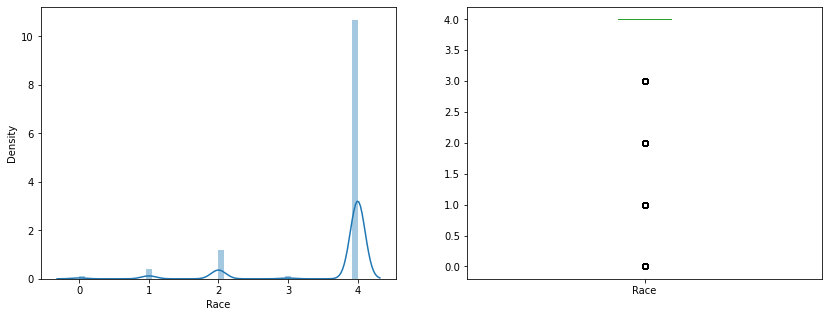

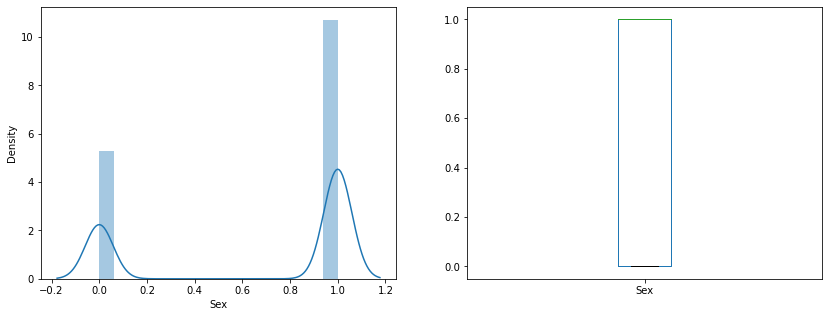

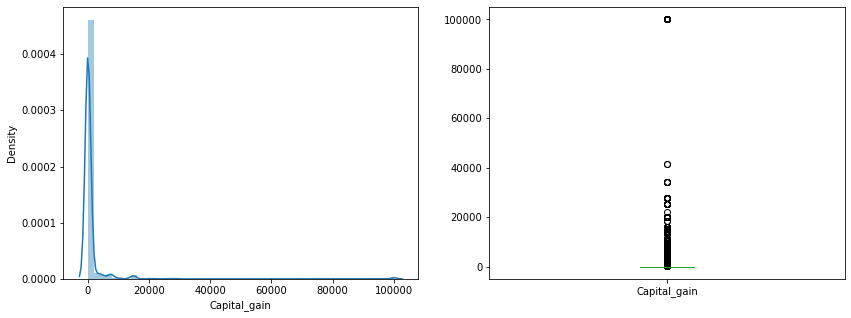

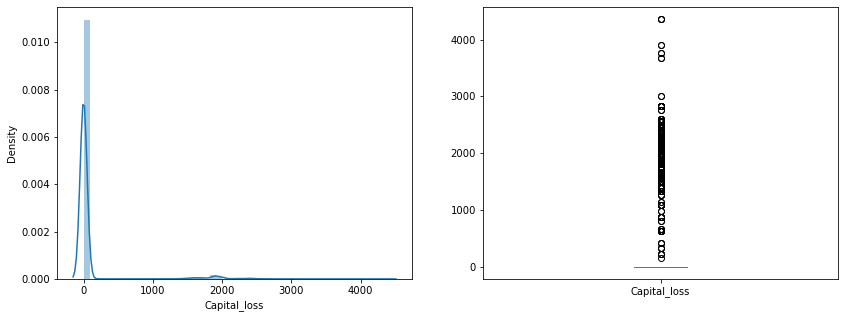

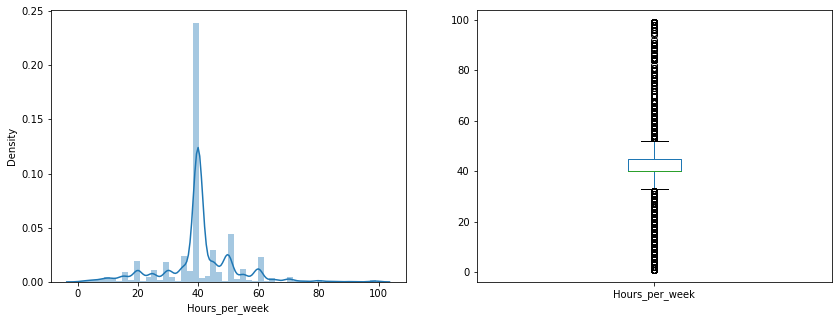

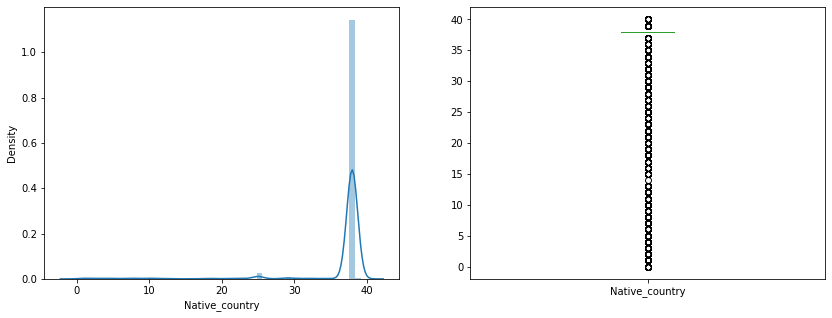

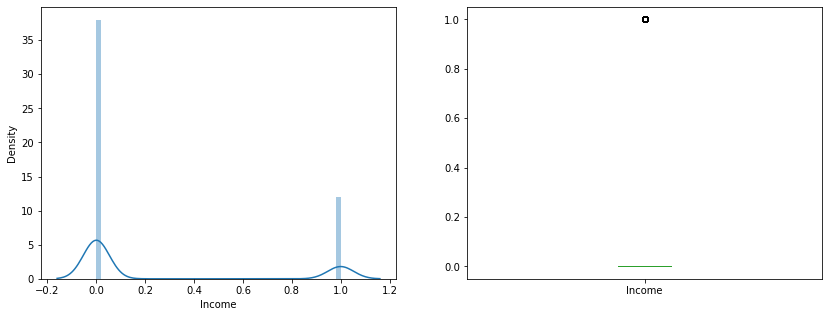

<Figure size 1008x360 with 0 Axes>

In [37]:
for i in range(0,len(df.columns)):
    plt.subplot(121)
    sns.distplot(df[df.columns[i]])
    plt.subplot(122)
    df[df.columns[i]].plot.box(figsize=(14,5))
    plt.figure(figsize=(14,5))
    
plt.show()

We can see the outliers in Age,Workclass,Fnlwgt,Education,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,
Income

# Removing Outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(df))

In [40]:
df_x=df[(z<3).all(axis=1)]

In [41]:
df.shape

(32560, 15)

In [42]:
df_x.shape

(27770, 15)

Data loss is 14%, hence we will try to remove the outliers through IQR method

We need to remove the outliers from Age,Fnlwgt,Education_num,Capital_gain,Capital_loss, Hours_per_week. Other columns are categorical
in nature, hence we cannot remove outliers from them.

In [44]:
columns=['Age', 'Fnlwgt', 'Education_num', 'Capital_gain',
       'Capital_loss', 'Hours_per_week']
for i in df[columns]:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bridge = df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[i].quantile(0.75)+(IQR*1.5)
    print('Lower bridge for',i,'is',lower_bridge),print('Upper_bridge for',i,'is',upper_bridge)

Lower bridge for Age is -2.0
Upper_bridge for Age is 78.0
Lower bridge for Fnlwgt is -61003.0
Upper_bridge for Fnlwgt is 415889.0
Lower bridge for Education_num is 4.5
Upper_bridge for Education_num is 16.5
Lower bridge for Capital_gain is 0.0
Upper_bridge for Capital_gain is 0.0
Lower bridge for Capital_loss is 0.0
Upper_bridge for Capital_loss is 0.0
Lower bridge for Hours_per_week is 32.5
Upper_bridge for Hours_per_week is 52.5


In [45]:
data=df.copy()
data.loc[data['Age']> 78.0,'Age'] = 78.0
data.loc[data['Fnlwgt']>415889.0,'Fnlwgt'] = 415889.0
data.loc[data['Education_num']>16.5,'Education_num'] =16.5
data.loc[data['Education_num']<4.5,'Education_num'] =4.5
data.loc[data['Capital_gain']>0, 'Capital_gain'] = 0
data.loc[data['Capital_gain']<0, 'Capital_gain'] = 0
data.loc[data['Capital_loss']>0, 'Capital_loss'] = 0
data.loc[data['Capital_loss']<0, 'Capital_loss'] = 0
data.loc[data['Hours_per_week']>52.5,'Hours_per_week'] = 52.5
data.loc[data['Hours_per_week']<32.5,'Hours_per_week'] = 32.5

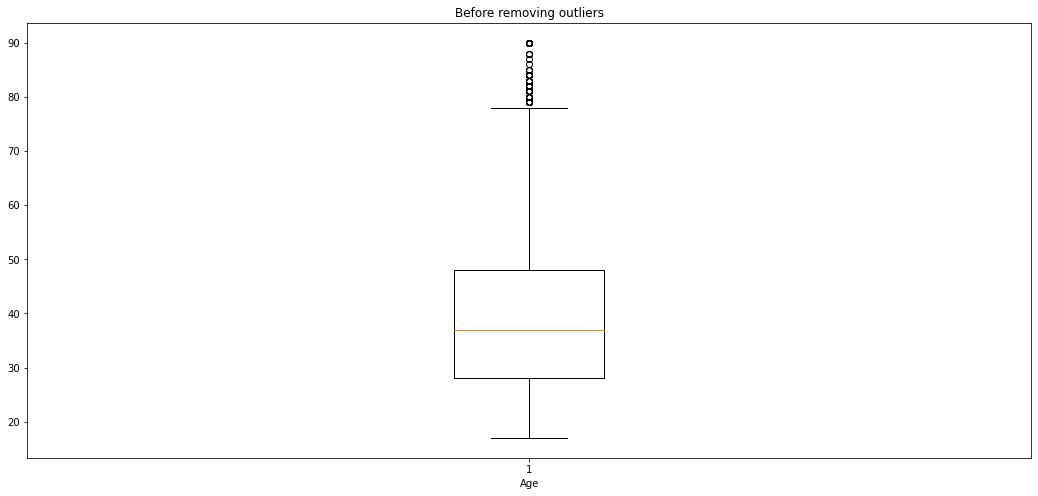

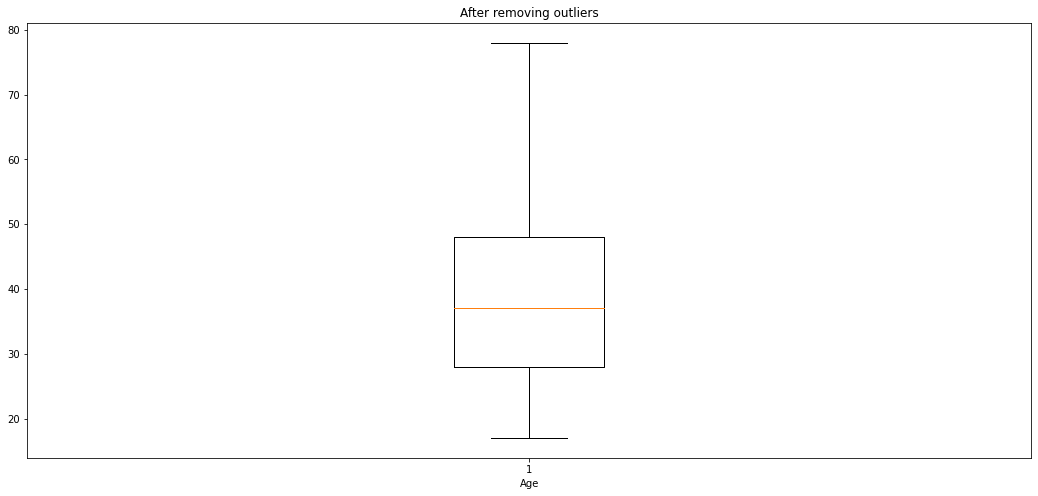

In [46]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.title('After removing outliers')
plt.show()

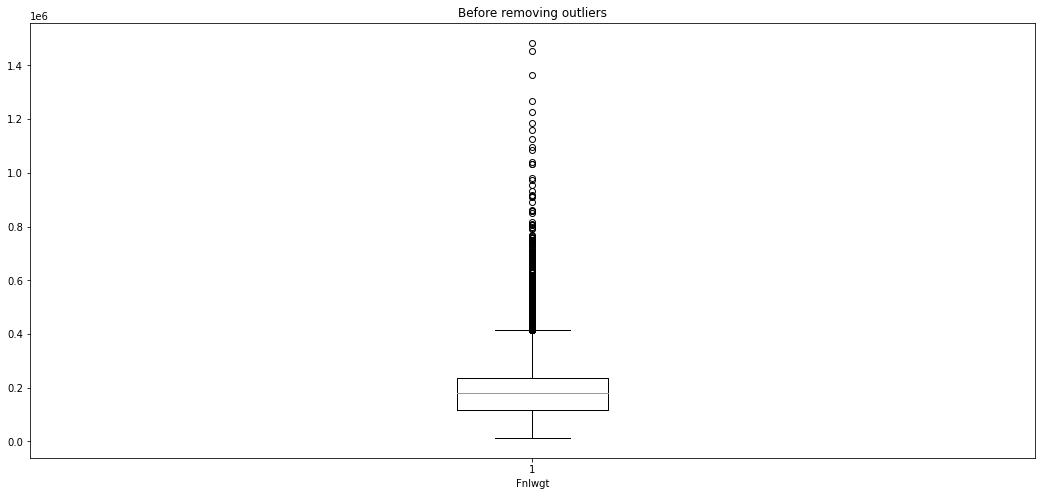

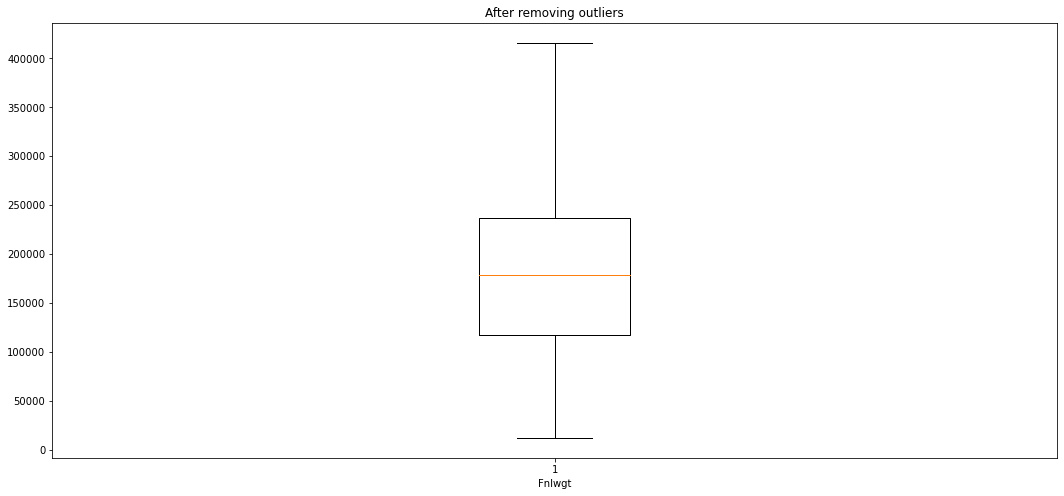

In [47]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Fnlwgt'])
plt.xlabel('Fnlwgt')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Fnlwgt'])
plt.xlabel('Fnlwgt')
plt.title('After removing outliers')
plt.show()

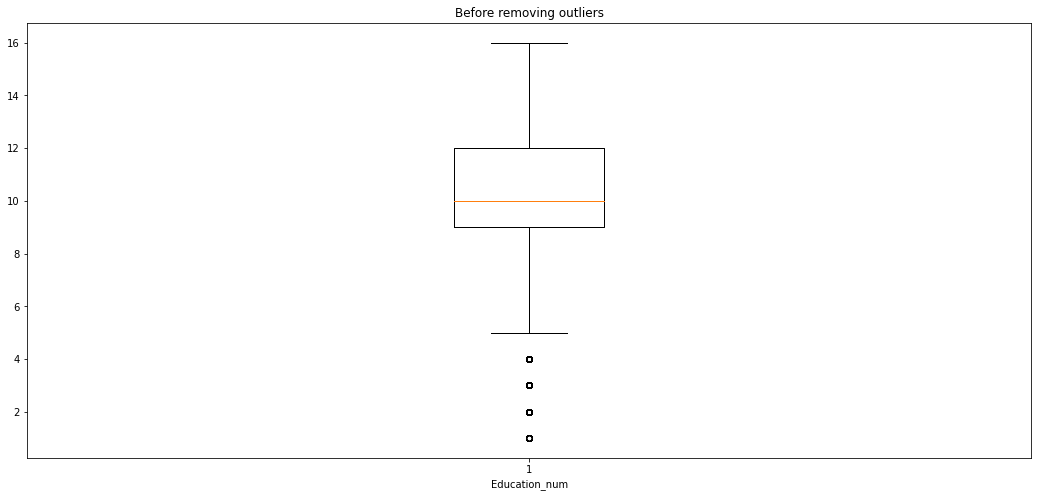

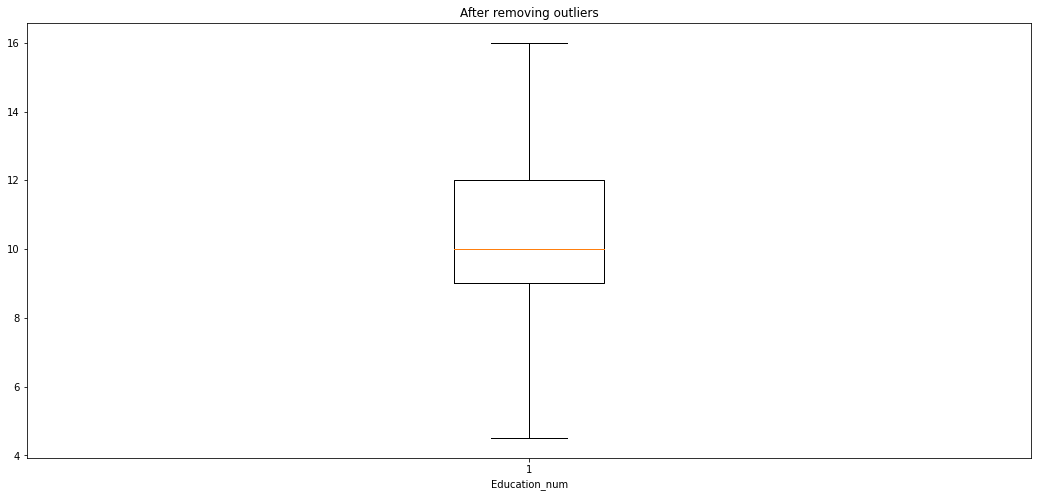

In [48]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Education_num'])
plt.xlabel('Education_num')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Education_num'])
plt.xlabel('Education_num')
plt.title('After removing outliers')
plt.show()

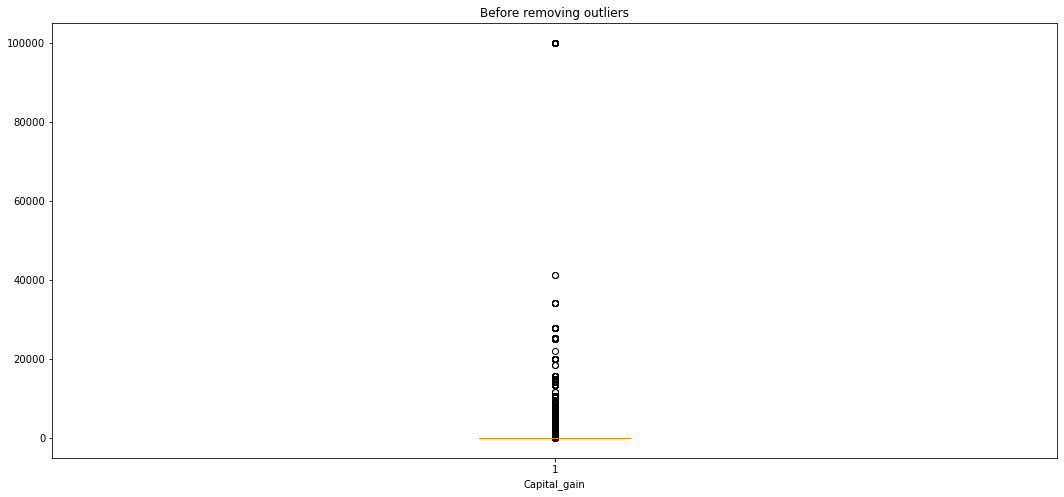

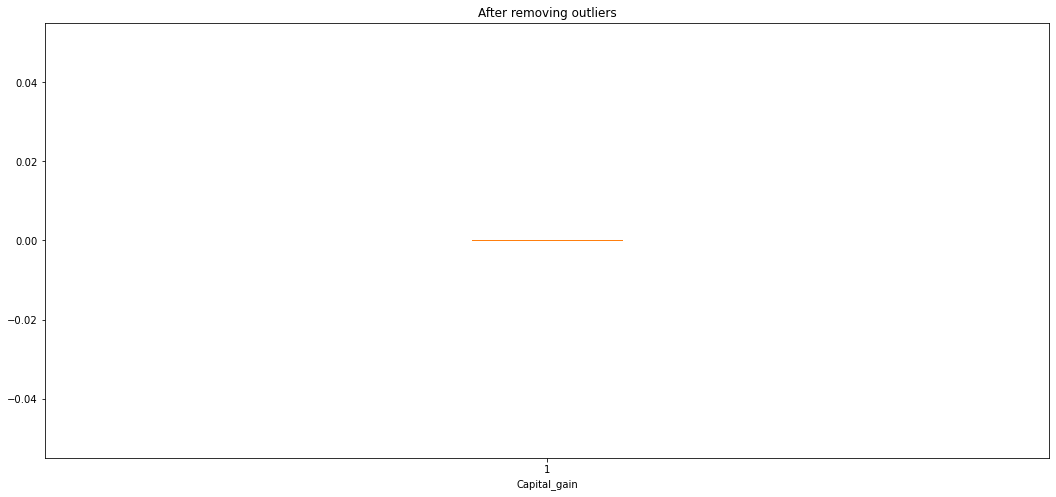

In [49]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Capital_gain'])
plt.xlabel('Capital_gain')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Capital_gain'])
plt.xlabel('Capital_gain')
plt.title('After removing outliers')
plt.show()

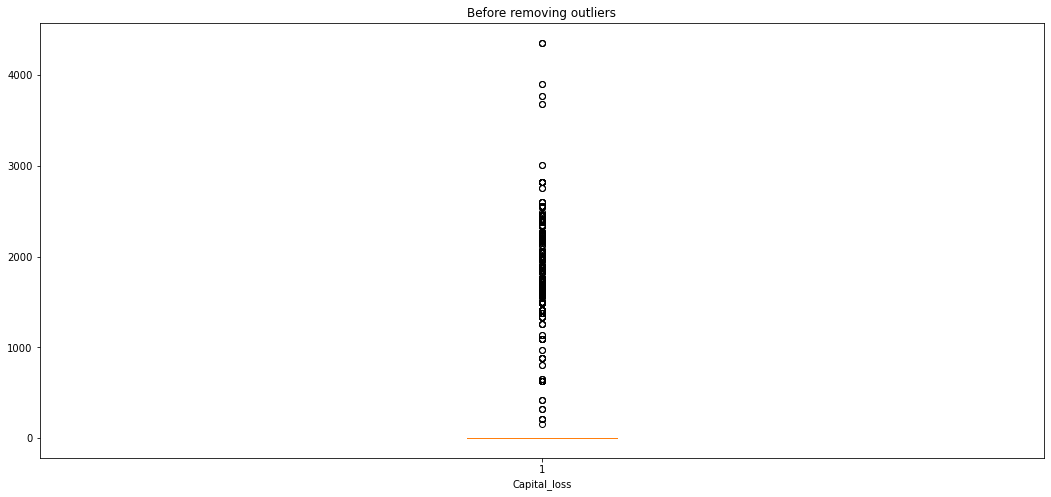

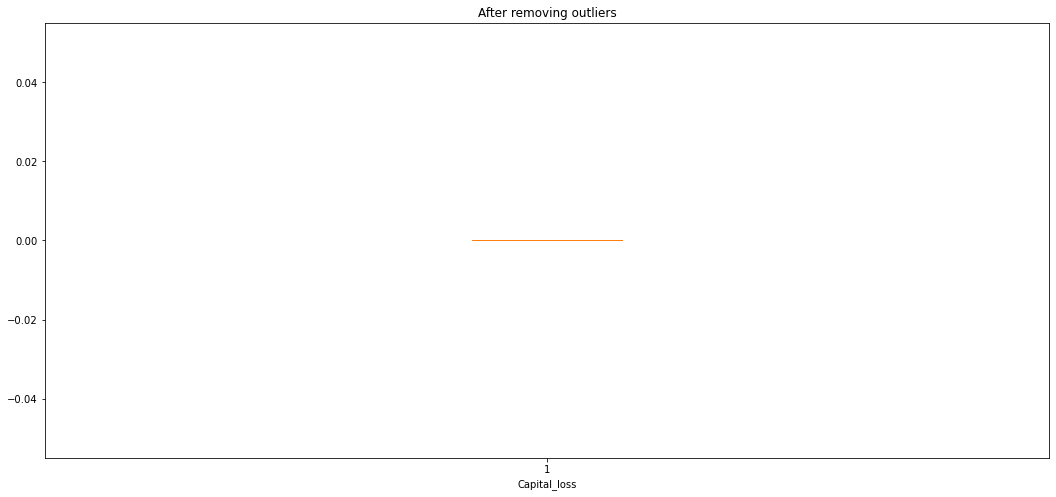

In [50]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Capital_loss'])
plt.xlabel('Capital_loss')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Capital_loss'])
plt.xlabel('Capital_loss')
plt.title('After removing outliers')
plt.show()

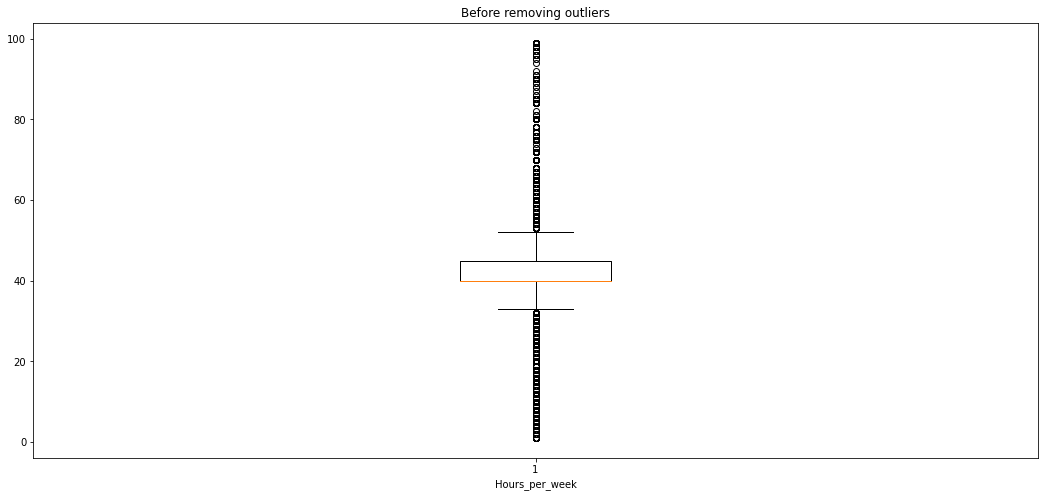

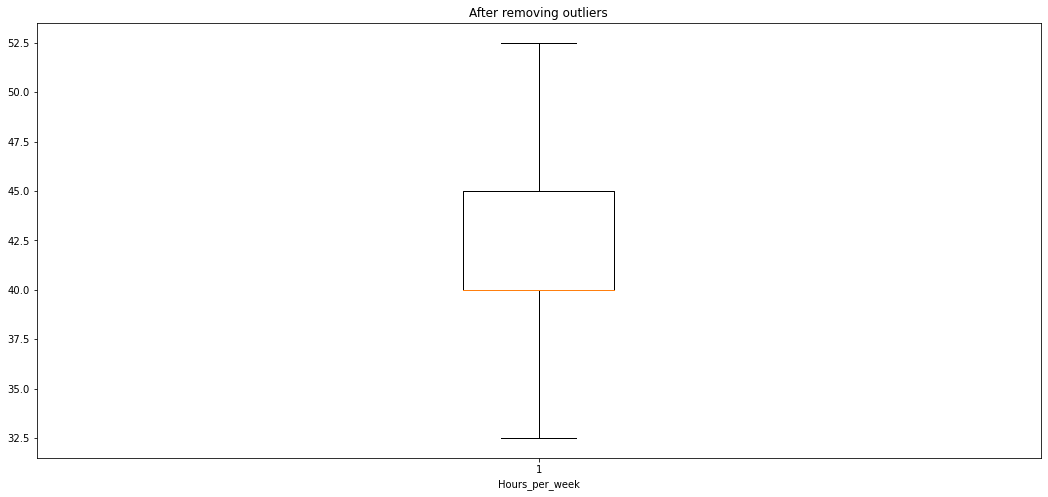

In [51]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Hours_per_week'])
plt.xlabel('Hours_per_week')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Hours_per_week'])
plt.xlabel('Hours_per_week')
plt.title('After removing outliers')
plt.show()

In [52]:
df=data

# Splitting the dataset

In [54]:
x=df.drop('Income',axis=1)

In [55]:
y=df['Income']

In [56]:
x.skew()

Age               0.513883
Workclass         0.076178
Fnlwgt            0.548285
Education        -0.934063
Education_num    -0.034043
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.438274
Native_country   -4.243083
dtype: float64

We can see that skewness in Education,Relationship,Race,Sex,Native_country is more than 0.5 but all of them are categorical in 
nature, so we dont have to remove the skewness from these columns

# Scaling the data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()

In [64]:
df_x=sc.fit_transform(x)

In [66]:
df_x = pd.DataFrame(df_x,columns=x.columns)

In [68]:
x=df_x

# Find the best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [71]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxaccu:
        maxaccu=accu
        maxRS=i
print('Best accuracy',maxaccu,'for random state',maxRS)

Best accuracy 0.8142915642915642 for random state 83


In [72]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [76]:
model = [lr,gnb,svc,rfc,dtc]

for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=83)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('Accuracy score of',i)
    print(accuracy_score(y_test,pred))
    print(f1_score(y_test,pred))
    print(precision_score(y_test,pred))
    print(recall_score(y_test,pred))
    scr = cross_val_score(i,x,y,cv=5)
    print('Cross Validation of',i,'is',scr.mean())
    print('Difference between Accuracy score and Cross Validation score is', accuracy_score(y_test,pred) - scr.mean())
    print('\t')
    print('\t')

Accuracy score of LogisticRegression()
0.8142915642915642
0.5203595980962453
0.6735112936344969
0.4239551917277036
Cross Validation of LogisticRegression() is 0.8063267813267814
Difference between Accuracy score and Cross Validation score is 0.007964782964782868
	
	
Accuracy score of GaussianNB()
0.7802006552006552
0.602922137969299
0.5281918340894362
0.7022834984920293
Cross Validation of GaussianNB() is 0.7793611793611793
Difference between Accuracy score and Cross Validation score is 0.0008394758394758561
	
	
Accuracy score of SVC()
0.8334357084357085
0.5886219974715551
0.7123623011015912
0.5015079707022835
Cross Validation of SVC() is 0.8280712530712531
Difference between Accuracy score and Cross Validation score is 0.0053644553644554005
	
	
Accuracy score of RandomForestClassifier()
0.8296478296478297
0.6119402985074628
0.6670055922724962
0.5652735889702715
Cross Validation of RandomForestClassifier() is 0.8274262899262899
Difference between Accuracy score and Cross Validation sco

Here difference between Accuracy score and Cross validation score is least in GaussianNB.

# Hyperparameter tuning of GaussianNB

In [77]:
from sklearn.model_selection import GridSearchCV

In [87]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [88]:
from sklearn.preprocessing import PowerTransformer
gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='f1')
Data_transformed = PowerTransformer().fit_transform(x_train,y_train)

gs_NB.fit(Data_transformed,y_train);
print('Best Score: ', gs_NB.best_score_)
print('Best Params: ', gs_NB.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score:  0.6079765540358232
Best Params:  {'var_smoothing': 0.43287612810830584}


In [91]:
GNB_mod = GaussianNB(var_smoothing = 0.43287612810830584)
GNB_mod.fit(x_train,y_train)
pred=GNB_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))

0.7925880425880426
0.6090312620609802
0.5515554002097168
0.6798793623438173


# AUC ROC Curve

In [84]:
from sklearn.metrics import roc_auc_score,roc_curve

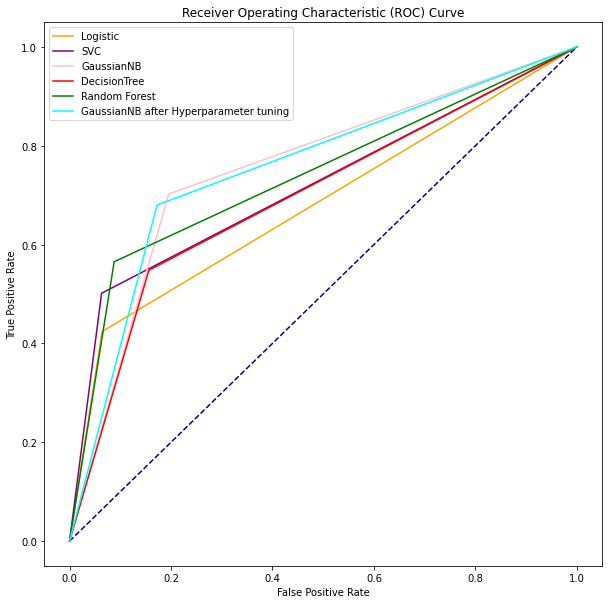

In [90]:
plt.figure(figsize = (10,10))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


fpr, tpr, thresholds = roc_curve(y_test, lr.predict(x_test))
plt.plot(fpr, tpr, color='orange', label='Logistic')

fpr1, tpr1, thresholds = roc_curve(y_test, svc.predict(x_test))
plt.plot(fpr1, tpr1, color='purple', label= 'SVC')

fpr2, tpr2, thresholds = roc_curve(y_test, gnb.predict(x_test))
plt.plot(fpr2, tpr2, color='pink', label='GaussianNB')

fpr3, tpr3, thresholds = roc_curve(y_test, dtc.predict(x_test))
plt.plot(fpr3, tpr3, color='red', label='DecisionTree')

fpr4, tpr4, thresholds = roc_curve(y_test, rfc.predict(x_test))
plt.plot(fpr4, tpr4, color='green', label='Random Forest')

fpr4, tpr4, thresholds = roc_curve(y_test,GNB_mod.predict(x_test))
plt.plot(fpr4, tpr4, color='cyan', label='GaussianNB after Hyperparameter tuning')

plt.legend()
plt.show()

# Saving the model

In [92]:
import pickle

In [94]:
filename='census.pkl'
pickle.dump(GNB_mod,open(filename,'wb'))

In [96]:
loaded_model=pickle.load(open('census.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7925880425880426


In [97]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Predicted,0,0,0,0,0,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0
Original,0,0,0,0,0,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0
